In [1]:
import numpy as np
import pandas as pd

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from datasets.vowel import X_train, y_train, X_test, y_test

In [2]:
def error_rate(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    return {
        'alpha':      1 - clf.reg_param,
        'Train Data': 1 - clf.score(X_train, y_train),
        'Test Data':  1 - clf.score(X_test, y_test),
    }

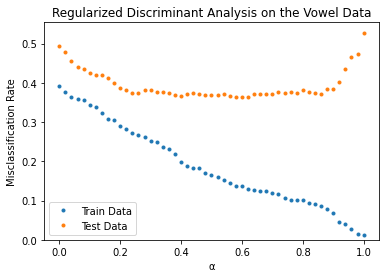

In [3]:
ax = pd.DataFrame(data=[
    error_rate(QuadraticDiscriminantAnalysis(reg_param=1 - alpha),
               X_train, y_train, X_test, y_test)
    for alpha in np.linspace(0, 1, num=51)
]).set_index('alpha').plot(style='.')
ax.set_ylim(0, None)
ax.set_xlabel("α")
ax.set_ylabel("Misclassification Rate")
ax.set_title("Regularized Discriminant Analysis on the Vowel Data");